# Python stats and Plotting Tutorial Assignment
## BSGP 7030

## Import packages necessary for assignment

In [97]:
from matplotlib import pyplot as plt 
import numpy as np 
import os
import pandas as pd
from pandas import plotting
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import urllib.request


# Data Representation and Interaction:
## Learning pandas data-frames

## Read and print data from brain_size.csv

In [4]:
data = pd.read_csv('brain_size.csv', sep=';', na_values='.')
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


## Generate a dataframe from an array 

In [5]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

pd.DataFrame({'t':t, 'sin':sin_t, 'cos':cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


## Manipulating Data 

### Print out data shape, Index, and Gender from bran_size.csv

In [6]:
print(data.shape)

print(data.columns)

print(data['Gender'])

(40, 8)
Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')
0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


### Group VIQ data by gender and print out mean. 

In [7]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


### Print the gender averages of all data 

In [8]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Exercise 1

### Mean value for VIQ for the full population 

In [9]:
VIQ_mean = data['VIQ'] 
print(VIQ_mean.mean())

112.35


### Calculate number of males/females included in the study

In [10]:
gender_count = data['Gender'].value_counts()
print(gender_count)

Gender
Female    20
Male      20
Name: count, dtype: int64


### Average MRI_Count for males and females in log units

In [11]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['MRI_Count']:
    print((gender, np.log(value.mean())))

('Female', 13.66776965820175)
('Male', 13.769315194386103)


## Plotting Data

### Plot Weight, Height, and MRI Count on a scatter plot 

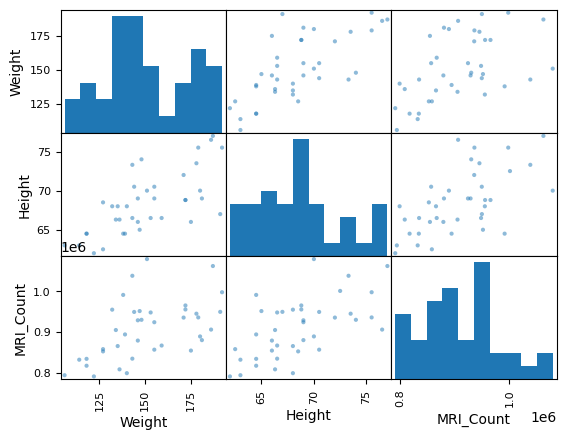

In [12]:
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plt.show()

### Plot PIQ, VIQ, and FSIQ on Scatter plot 

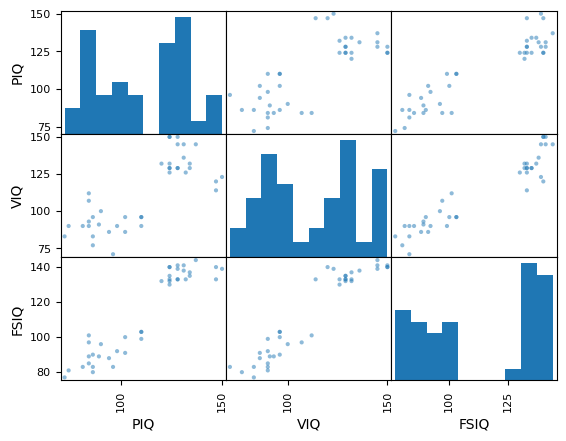

In [13]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])   
plt.show()

## Exercise 2

### Plot previous scatter matrix for males only 

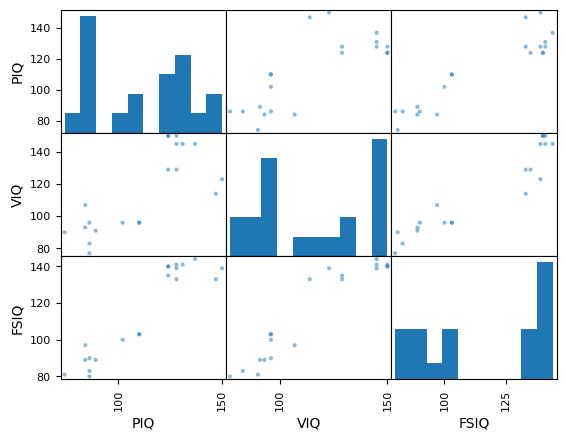

In [14]:
male_data = data[data['Gender'] == 'Male'] 
plotting.scatter_matrix(male_data[['PIQ', 'VIQ', 'FSIQ']]) 
plt.show()

### Plot previous scatter matrix for males only 

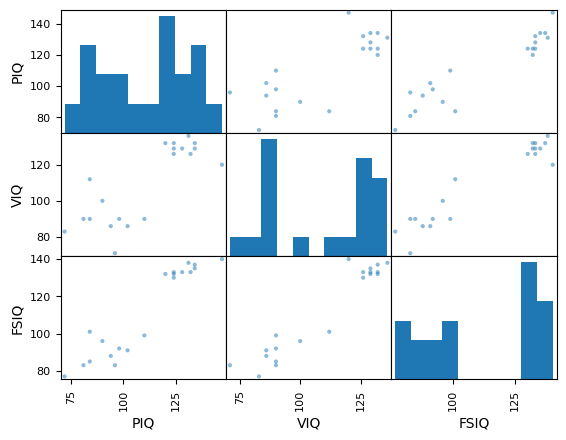

In [15]:
female_data = data[data['Gender'] == 'Female'] 
plotting.scatter_matrix(female_data[['PIQ', 'VIQ', 'FSIQ']])
plt.show()

### There does not seem to be a correlation between gender and the two sub-populations

# Hypothesis testing: Comparing two groups 

## t-test 

### Sample t-test: testing the value of a population mean 

In [16]:
# Re-set data variable as brain_size.csv for ease of use 
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

# Remove Nan values from weight column so t-test can be performed
data_cleaned = data.dropna(subset=['Weight'])

In [17]:
stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=30.08809997084933, pvalue=1.3289196468727879e-28, df=39)

### Sample t-test: testing for differences across populations 

In [18]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

## Paired Tests: doing multiple measurements on the same individual 

### First use 2 sample test as before: 

In [19]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

### This time use a paired test: 

In [20]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

### The paired test is the same as the 1-sample test:

In [21]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

### To relax the assumption of Gaussian errors, use Wilcoxon signed-rank test:

In [22]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

/srv/conda/envs/notebook/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

## Exercise 3

### Test the difference between weight in males and females 

In [23]:
female_wgt = data_cleaned[data_cleaned['Gender'] == 'Female']['Weight']
male_wgt = data_cleaned[data_cleaned['Gender'] == 'Male']['Weight']
stats.ttest_ind(female_wgt, male_wgt)

TtestResult(statistic=-4.870950921940696, pvalue=2.227293018362118e-05, df=36.0)

### Use non parametric statistics to test the difference between VIQ in males and females 

In [24]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.wilcoxon(female_viq, male_viq) 

WilcoxonResult(statistic=82.5, pvalue=0.40909767150878906)

# Linear Models, multiple factors, and analysis of variance 

## "Formulas" to specifcy statistical models 

### Linear regression

In [25]:
# generate an array for the example
x = np.linspace(-5, 5, 20) 
np.random.seed(1)

#normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

# create a data frame containing all relevant variables 
data = pd.DataFrame({'x':x, 'y':y})

# Specify OLS model and fit it 
model = ols("y ~ x", data).fit()

# print the model 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           8.56e-08
Time:                        15:38:55   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

### Exercise 4

#### Retreive the estimated parameters from the previously generated model

In [26]:
parameters = model.params
print(parameters)

Intercept   -5.533459
x            2.936888
dtype: float64


### Categorical variables: comparing groups or multiple categories 

In [27]:
# set variable for brain size data 
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

#### Compare IQ of male and female using linear model 

In [28]:

model = ols("VIQ ~ Gender +1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.445
Time:                        15:38:57   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

#### Force an integer column to be treated as categorical 

In [29]:
model = ols('VIQ ~ C(Gender)', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.445
Time:                        15:38:58   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           109.4500      5.30

#### Compare different types of IQ by generating a "long-form" table where the type of IQ id inficated by a categorical value 

In [30]:
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
print(data_long)

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


#### generate OLS model for "long-form" table 

In [31]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.643
Time:                        15:39:00   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

In [32]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

## Multiple Regression: including multiple factors 

### Generate ols model for iris data 

In [33]:
iris_data = pd.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', iris_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.58e-20
Time:                        15:39:01   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

## Post-hoc hypothesis testing: analysis of variance (ANOVA)

In [34]:
# example of a vector of contrast for anova with an F-test 
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.2453353465741173, p=0.07369058781701415, df_denom=146, df_num=1>


## Exercise 5

### Test if the VIQ of male and female are different after removing the effect of brain size, height and weight.

In [40]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

#### Generate model only incorporating VIQ and Gender

In [43]:
model = ols('VIQ ~ Gender', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.445
Time:                        15:43:35   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

#### Perform f_test on the two genders comparing VIQ

In [45]:
print(model.f_test([0, 1,]))

<F test: F=0.5969357497420034, p=0.4445287677858303, df_denom=38, df_num=1>


# More Visualization: seaborn for statistical exploration

## Import Wage Data from http://lib.stat.cmu.edu/datasets/CPS_85_Wages

In [58]:
if not os.path.exists('wages.txt'):
    # Download file for example if not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')
# Name the columns of the data 
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

wage_data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, engine = 'python')
wage_data.columns = short_names

# Log-transform wages, as they are increased with multiplicative factors 

wage_data['WAGE'] = np.log10(wage_data['WAGE'])

### Print wage data 

In [59]:
print(wage_data)

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION      WAGE  AGE  RACE  \
0            8      0    1          21      0  0.707570   35     2   
1            9      0    1          42      0  0.694605   57     3   
2           12      0    0           1      0  0.824126   19     3   
3           12      0    0           4      0  0.602060   22     3   
4           12      0    0          17      0  0.875061   35     3   
..         ...    ...  ...         ...    ...       ...  ...   ...   
529         18      0    0           5      0  1.055378   29     3   
530         12      0    1          33      0  0.785330   51     1   
531         17      0    1          25      1  1.366423   48     1   
532         12      1    0          13      1  1.298416   31     3   
533         16      0    0          33      0  1.186956   55     3   

     OCCUPATION  SECTOR  MARR  
0             6       1     1  
1             6       1     1  
2             6       1     0  
3             6       0     0  

## Pairplot: Scatter matrices 

### Use seaborn to display a scatter matrix of multiple variables 

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


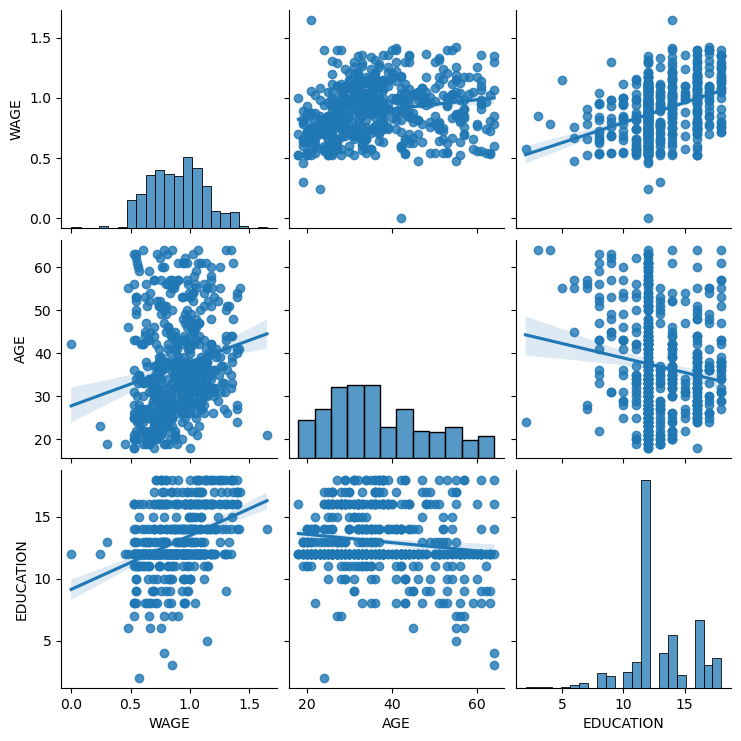

In [69]:
sns.pairplot(wage_data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')

### Use a pairplot to show the effect of gender on wage

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Effect of gender: 1=Female, 0=Male')

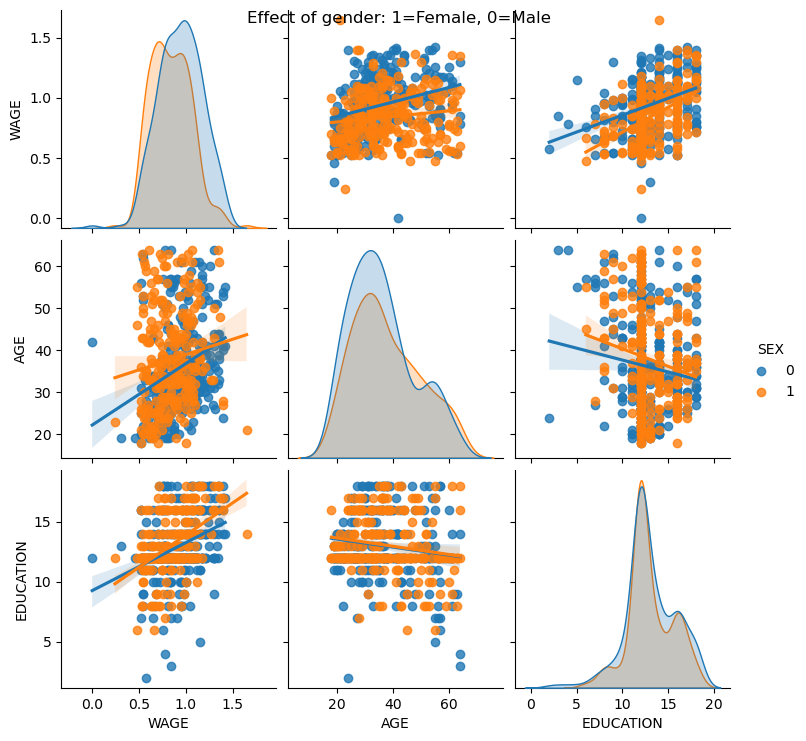

In [74]:
sns.pairplot(wage_data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX')  
plt.suptitle('Effect of gender: 1=Female, 0=Male')

### Useful code: Change output of graphs to matplotlib format 

In [78]:
plt.rcdefaults()

## lmplot: plotting a univariate regression

### Use to plot the relation between one varibale and another 

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


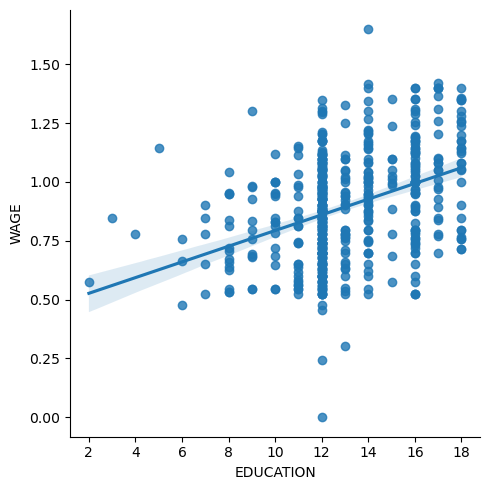

In [87]:
sns.lmplot(y='WAGE', x='EDUCATION', data=wage_data)

### Useful code: Plot a robust regression 

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


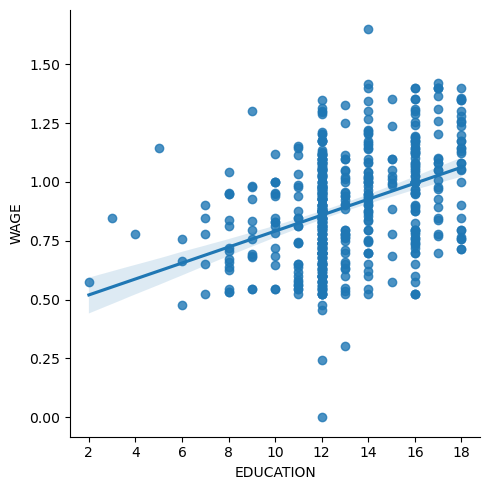

In [88]:
# can use statsmodels: statsmodels.formula.api.rlm()
# can also use seaborn by adding robust=True

sns.lmplot(y='WAGE', x='EDUCATION', data=wage_data, robust=True)

# Testing for interactions

## Test for variance of a slope accross two different populations
### Perform this through a "variation"

In [109]:
wage_data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, names=['education', 'gender', 'wage'],
                       usecols=[0, 2, 5], engine = 'python'
                       )

# Convert genders to strings (this is particulary useful so that the
# statsmodels formulas detects that gender is a categorical variable)
wage_data['gender'] = np.choose(wage_data.gender, ['male', 'female'])

# Log-transform the wages, because they typically are increased with
# multiplicative factors
wage_data['wage'] = np.log10(wage_data['wage'])



In [110]:
result = sm.ols(formula='wage ~ education + gender + education * gender',
                data=wage_data).fit()      
print(result.summary())    

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           2.94e-25
Time:                        16:30:22   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


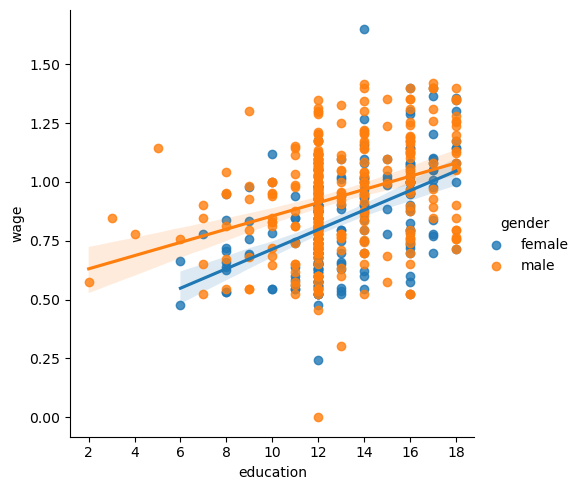

In [112]:
# Plot 2 linear fits for male and female.
sns.lmplot(y='wage', x='education', hue='gender', data=wage_data)